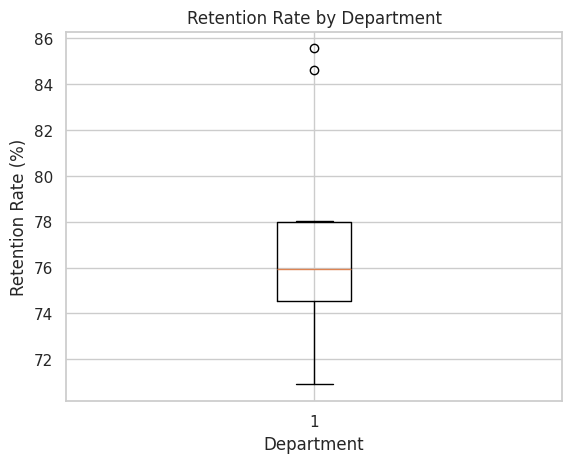

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('P2.csv')

result = df.groupby('Department')['left'].mean().reset_index()
result['retention_rate'] = (1 - result['left']) * 100

plt.boxplot(result['retention_rate'])
plt.title('Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Retention Rate (%)')
plt.show() 

In [15]:
retention_rate = df.groupby('Department')['left'].sum().reset_index()
total = sum(retention_rate['left'])
retention_rate['retention_rate'] = retention_rate['left'] / total * 100
retention_rate

,Department,left,retention_rate
0,IT,273,7.644917
1,RandD,121,3.388407
2,accounting,204,5.712686
3,hr,215,6.020722
4,management,91,2.548306
5,marketing,203,5.684682
6,product_mng,198,5.544665
7,sales,1014,28.395407
8,support,555,15.541865
9,technical,697,19.518342


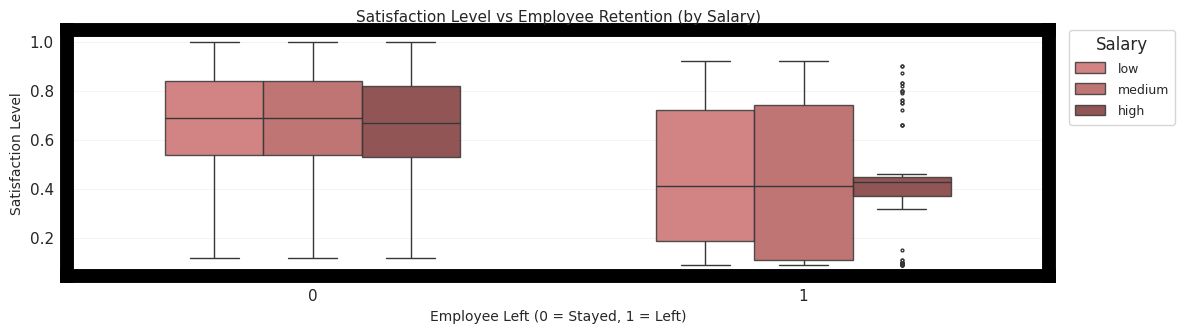

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Settings ----------
plt.rcParams.update({'axes.edgecolor':'black', 'axes.linewidth':2})  # thick border
sns.set(style="whitegrid")

# ---------- Load data ----------
# filename = input("CSV filename: ").strip()   # e.g. HR_data.csv
df = pd.read_csv('P2.csv')

# Ensure correct dtypes
df['salary'] = pd.Categorical(df['salary'], categories=['low','medium','high'], ordered=True)
# 'left' is numeric (0/1) in provided sample; if string, convert:
df['left'] = pd.to_numeric(df['left'], errors='coerce').astype(int)

# ---------- Make a long horizontal canvas similar to your image ----------
fig, ax = plt.subplots(figsize=(12,3.5))   # long & short height like your screenshot

# ---------- Primary plot: boxplot of satisfaction_level by left, grouped by salary ----------
# This combination often produces one dominant box (if many samples in one group)
sns.boxplot(
    x='left',
    y='satisfaction_level',
    hue='salary',
    data=df,
    palette={'low':'#d95f5f','medium':'#c44e4e','high':'#8b2b2b'},  # red/brownish palette
    width=0.6,
    fliersize=2,
    linewidth=1,
    showcaps=True,
    boxprops=dict(alpha=0.85)
)

# ---------- Styling to mimic the screenshot ----------
# thick outer frame
for spine in ax.spines.values():
    spine.set_linewidth(10)               # thick black frame as in screenshot
    spine.set_color('black')

# grid & ticks
ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.25)
ax.set_xlabel("Employee Left (0 = Stayed, 1 = Left)", fontsize=10)
ax.set_ylabel("Satisfaction Level", fontsize=10)
ax.set_title("Satisfaction Level vs Employee Retention (by Salary)", fontsize=11)

# place legend outside and slim it
leg = ax.legend(title='Salary', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for text in leg.get_texts():
    text.set_fontsize(9)

plt.tight_layout()
plt.savefig("hr_boxplot.png", dpi=150, bbox_inches='tight')  # saves to working dir
plt.show()
